<a href="https://colab.research.google.com/github/yeb2Binfang/ECE-GY9143HPML/blob/main/Pytorch/4_regression.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [2]:
import torch
import torch.nn.functional as F
from torch.autograd import Variable
import matplotlib.pyplot as plt

In [3]:
x = torch.unsqueeze(torch.linspace(-1,1,100), dim = 1) # x data (tensor), shape = (100, 1)
y = x.pow(2) + 0.2 * torch.rand(x.size()) # noisy y data (tensor), shape = (100, 1)

# torch can only trian on Variable
x, y = Variable(x), Variable(y)

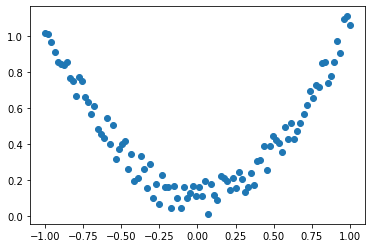

In [4]:
plt.scatter(x.data.numpy(), y.data.numpy())
plt.show()

In [5]:
class Net(torch.nn.Module):
  def __init__(self, n_feature, n_hidden, n_output):
    super(Net, self).__init__()
    self.hidden = torch.nn.Linear(n_feature, n_hidden) # hidden layer
    self.predict = torch.nn.Linear(n_hidden, n_output) # output layer

  def forward(self, x):
    x = F.relu(self.hidden(x)) # activation function for hidden layer
    x = self.predict(x)
    return x

In [6]:
net = Net(n_feature = 1, n_hidden = 10, n_output = 1) # define the network
print(net)

Net(
  (hidden): Linear(in_features=1, out_features=10, bias=True)
  (predict): Linear(in_features=10, out_features=1, bias=True)
)


In [7]:
optimizer = torch.optim.SGD(net.parameters(), lr = 0.2)
loss_func = torch.nn.MSELoss() # this is for regression mean squared loss

In [8]:
plt.ion() # something about ploting

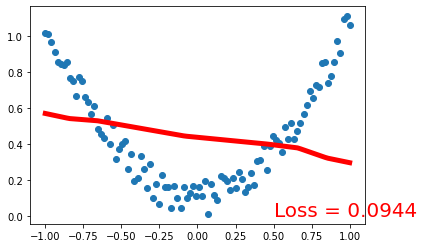

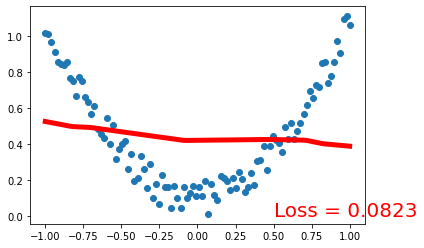

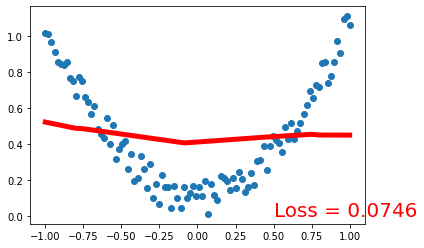

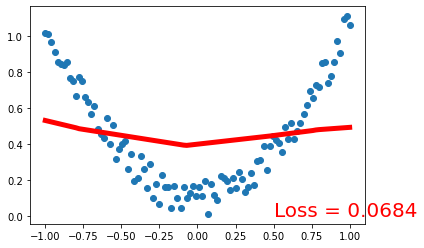

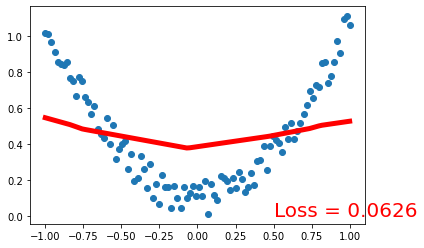

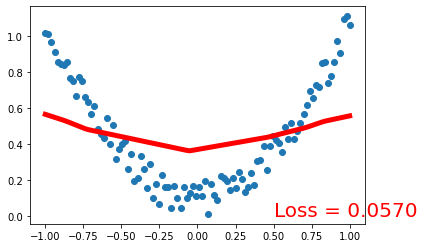

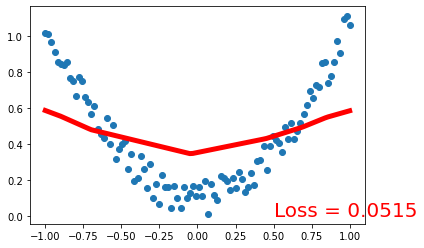

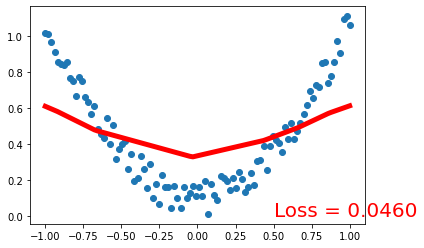

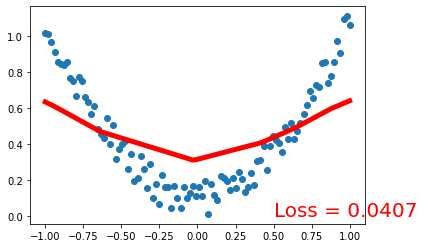

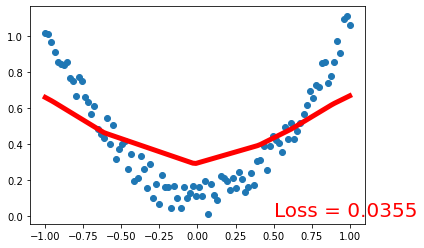

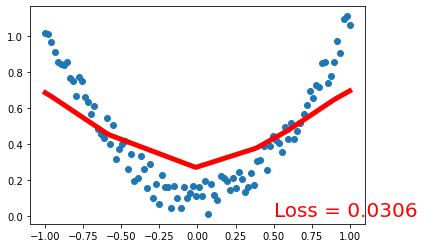

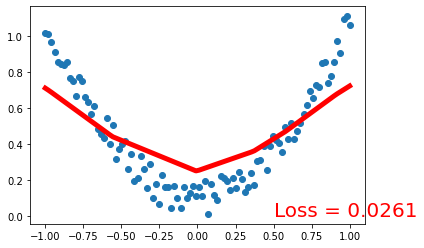

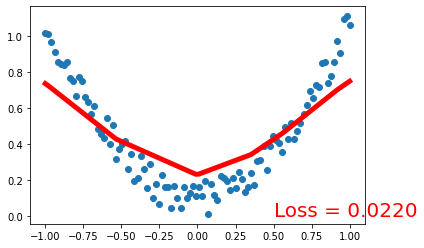

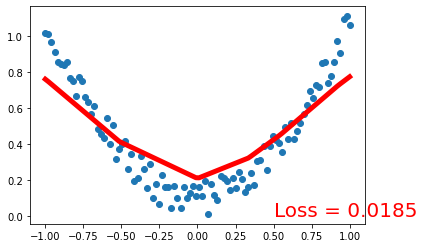

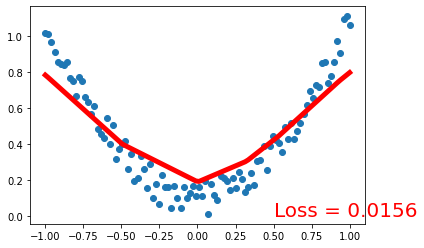

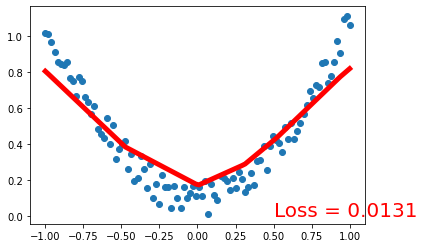

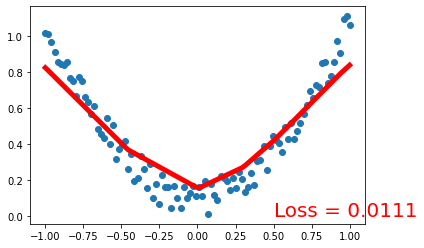

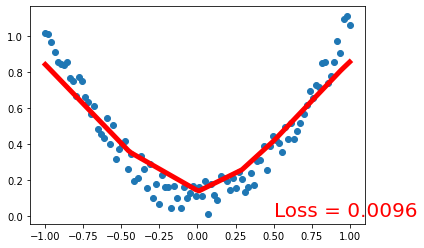

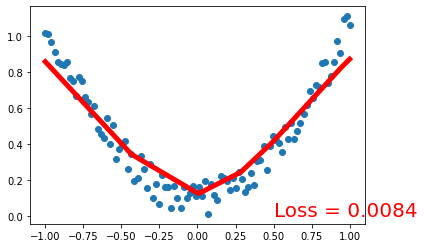

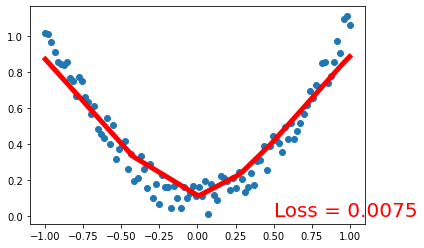

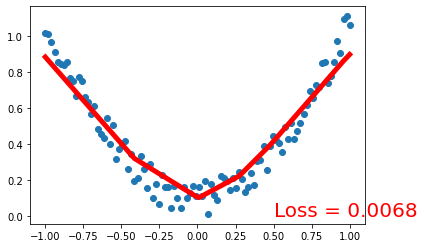

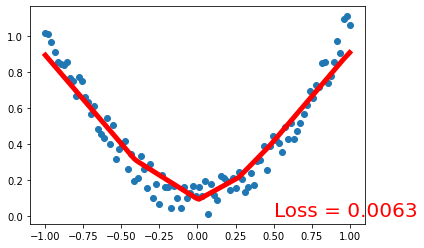

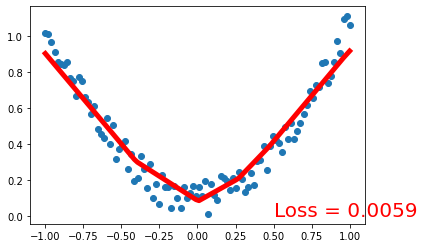

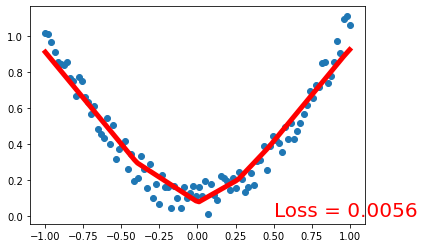

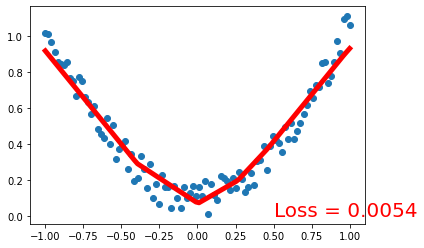

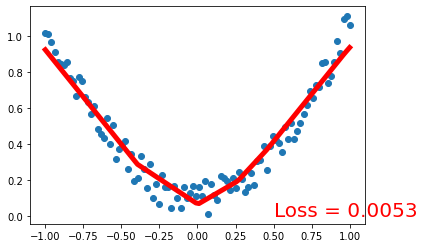

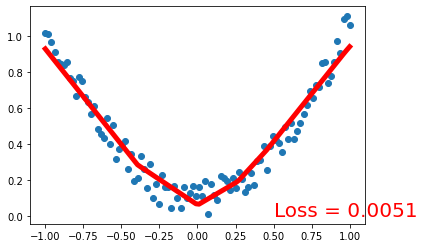

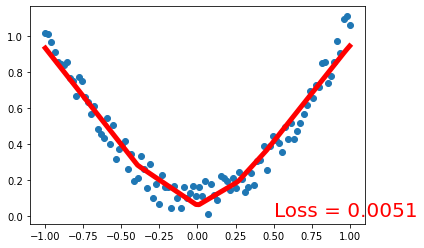

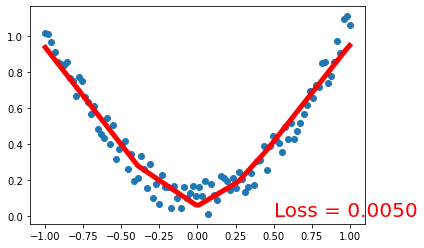

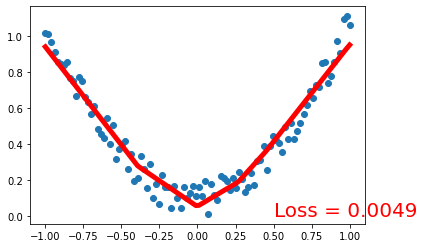

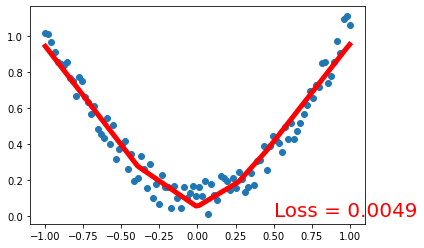

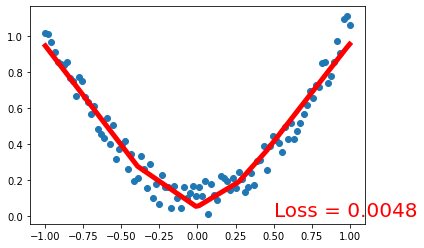

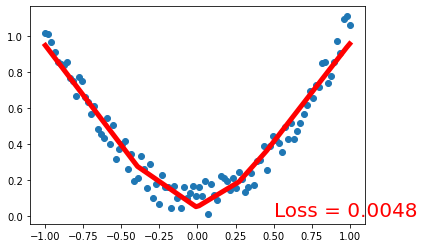

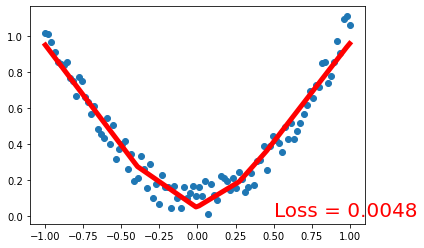

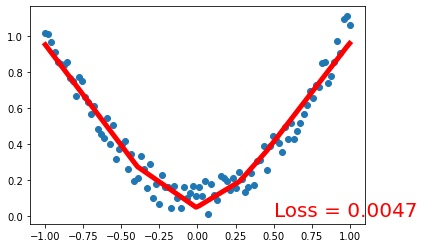

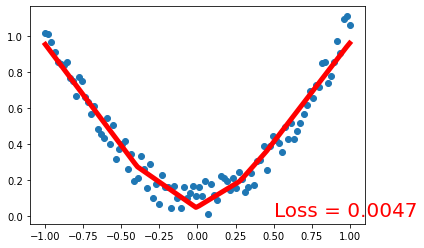

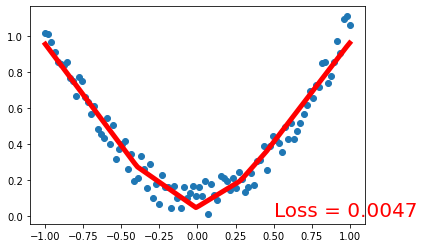

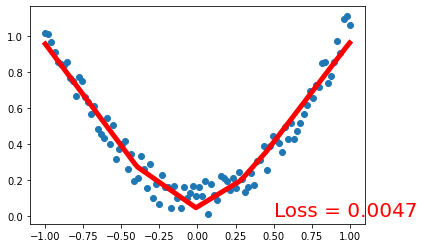

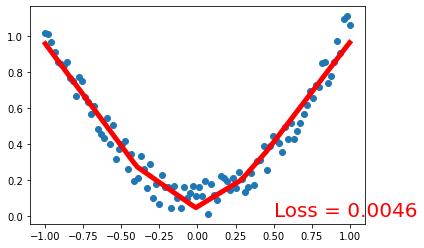

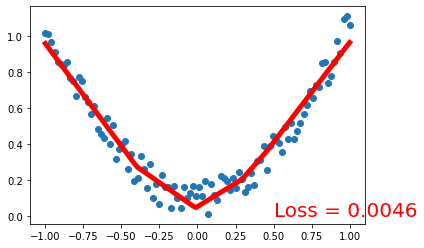

In [10]:
for t in range(200):
  prediction = net(x) # input x and predict based on x
  loss = loss_func(prediction, y)

  optimizer.zero_grad() # clear gradients for next train
  loss.backward() # backpropagation, compute gradients
  optimizer.step() # apply gradients

  if t % 5 == 0:
    # plot and show learning process
    plt.cla()
    plt.scatter(x.data.numpy(), y.data.numpy())
    plt.plot(x.data.numpy(), prediction.data.numpy(), 'r-', lw = 5)
    plt.text(0.5, 0, 'Loss = %.4f'% loss.data.numpy(), fontdict = {'size': 20, 'color': 'red'})
    plt.pause(0.1)
plt.ioff()
plt.show()